# Introduction and Motivation
As the world is still recovering from the shock of the COVID-19 pandemic, personal health and healthcare has consistently been at the center stage of attention as one of the most difficult problems to solve. 

As of 2022, more than half of Americans think that healthcare cost is too high and agreed that many people they know cannot afford healthcare (ref.8), the percentage of which seems alarmingly high and is indicative of a much larger issue. 

From the big picture, there are many potential causes for the high price tags for medical services such as administration, greed, and high utilization of medical technology (ref.9), while the trend of increasing healthcare costs is unlikely to reverse anytime soon, it remains useful to examine the different contributing factors for both large scale public health planning and personal financial planning.

The goal for this project is to explore the relationship between US personal health expenditure per capita and potential influential elements including healthcare administration cost, public health spending, etc. using linear regression and PCA. Hence, we ask the question: Can we predict personal health spending per capita based on related factors and make better preparations for the future?

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the Data
Here we plot each independent variable against the dependent variable, personal health expenditure, to visualize and hypothesize any potential relationships.

/var/folders/cx/l3gnx5dn4gs_zc1wtxc7xyf40000gn/T/ipykernel_51259/1381836678.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


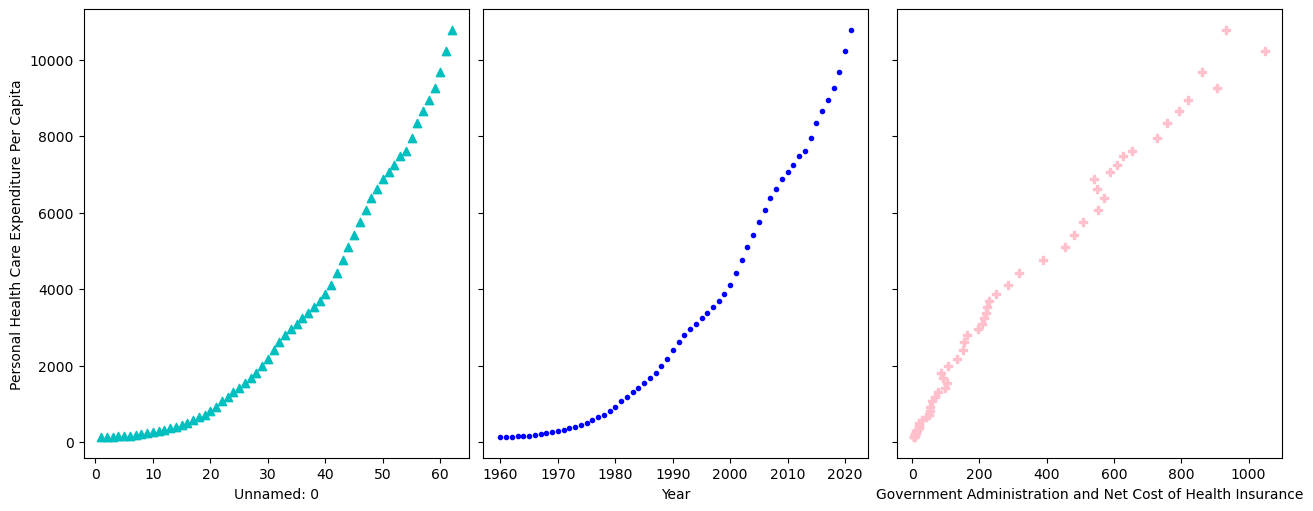

In [11]:
data_df = pd.read_csv('data/health_expenditure.csv')

variables = data_df.columns.values
target = variables[-1]
y = data_df[target]
markers = ['^', '.', 'P']
colors = ['c', 'b', 'pink']
fig, axs = plt.subplots(figsize=(13, 5), layout='constrained', ncols=3, nrows=1, sharey=True)

for i in range(3):
    axs[i].scatter(x=data_df[variables[i]], y=y, c=colors[i], marker=markers[i])
    axs[i].set_xlabel(variables[i])
axs[0].set_ylabel('Personal Health Care Expenditure Per Capita')
fig.show()

At a first glance at the graphs, one can hypothesize the following:
* Polynomial relationship between year and personal health care expenditure
* Linear relationship between government administration and cost of health insurance
* Inverse polynomial relationship between government public health spending and personal health care spending

# Linear regression for each independent variable
For each independent variable, execute a linear regression with the dependent variable using a line model (y = mx + b). Use the linear_model package from sklearn. What does the slope and R coefficient tell you about the relationship between each independent variable and the dependent variable?

First we import the linear regression package from sklearn, and the utility function written as part of the project.

In [12]:
from sklearn.linear_model import LinearRegression
from utility.linear_regression import do_single_linear_regression

Using `train_test_split_csv.py` in the utility package, we have separatedf the data into training and test set with a 0.8 split.

Results for linear regression with each feature are shown below:


        Feature: Year
        Training score: 0.9161186017258501
        Test score: 0.9004572881399133
        Coefficient: [161.44988089]
        Y_intercept: -317996.3467995888
        

        Feature: Government Administration and Net Cost of Health Insurance
        Training score: 0.9797440020187441
        Test score: 0.9874635942256105
        Coefficient: [10.66018505]
        Y_intercept: 454.6127130374416
        

        Feature: Government Public Health Activities
        Training score: 0.8513778705583367
        Test score: 0.8924568430185137
        Coefficient: [20.97759819]
        Y_intercept: 730.4323987559555
        


/Users/apple/Documents/ALIGN CS/CS6140 ML/machine-learning-projects/mlprojects/project1/utility/linear_regression.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


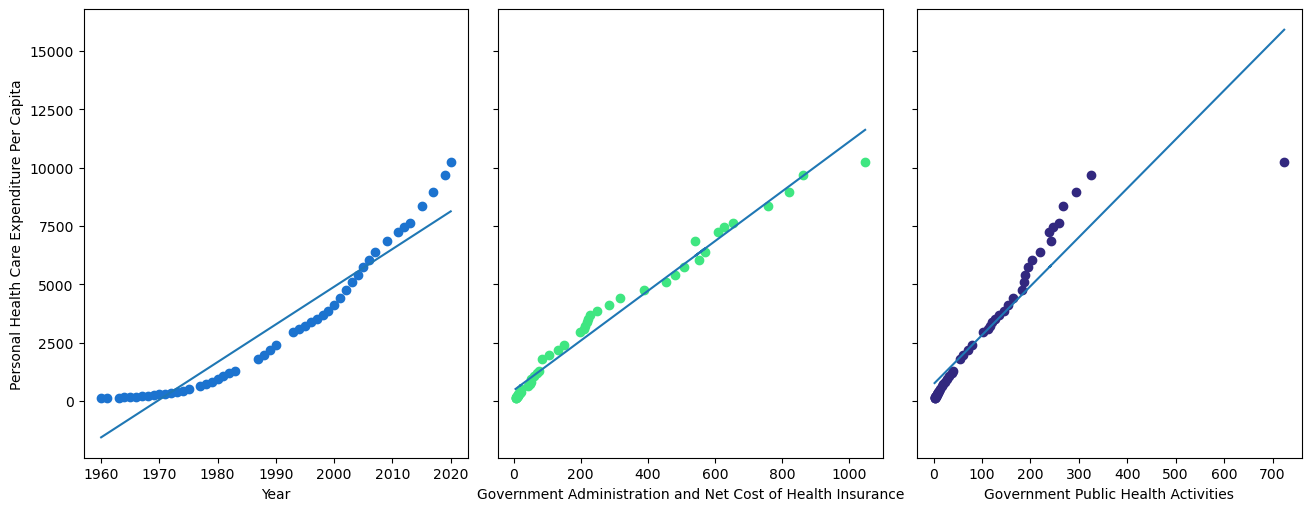

In [13]:
train_data_file = 'data/health_expenditure_test_2023-01-12 20:23:05.150435.csv'
test_data_file = 'data/health_expenditure_train_2023-01-12 20:23:05.150435.csv'
features = ['Year', 'Government Administration and Net Cost of Health Insurance', 'Government Public Health Activities']
do_single_linear_regression(train_data_file, test_data_file, target, features)

So what does the result tell us about each feature of our dataset?
Looking at the individual slopes, they all seem to have positive correlation with our dependent variable. However, each has a different R squared value with government administration and insurance cost having the best score - this corresponds with the graph where this feature clearly has the best fitted line.


# Execute a multiple linear regression

Now, we will perform a multiple linear regression with all of our variables and take a look at their coefficients.

In [14]:
from utility.linear_regression import do_multi_linear_regression

do_multi_linear_regression(train_data_file, test_data_file, target, features)

Training score: 0.9952506752230629
Test score: 0.989475238180856
Y_intercept: -101720.82949504962
Feature: Year
Coefficient: 51.7548944683423
Feature: Government Administration and Net Cost of Health Insurance
Coefficient: 8.253392838286508
Feature: Government Public Health Activities
Coefficient: -1.4036328269931242


The results demonstrate that the year variable is most strongly and positively related to personal health spending, and government public health expenditure is least correlated and actually negatively affects the dependent variable. 

# Linear regression with a polynomial model

As we saw in the first graph `Personal Health Expenditure vs. Year`, the relationship between these two variables look more like a polynomial one. To further analyze this, we will add on to our regression linear, squared, and cubic versions of this independent variable and plot the result.


In [15]:
from utility.linear_regression import do_polynomial_regression

train_data = pd.read_csv(train_data_file)
test_data = pd.read_csv(test_data_file)

X_train = train_data['Year'].to_numpy(copy=True)
y_train = train_data[target].to_numpy(copy=True)

X_test = test_data['Year'].to_numpy(copy=True)
y_test = test_data[target].to_numpy(copy=True)

b, poly_coef = do_polynomial_regression(X_train, y_train, X_test, y_test, 3)


Training score: 0.998600166620954
Test score: 0.9982006817146477
Y_intercept: 48191203.62391743
Feature: X^1
Coefficient: -66708.56133092368
Feature: X^2
Coefficient: 30.453164544140964
Feature: X^3
Coefficient: -0.004572802177293056


Text(0, 0.5, 'Personal Health Care Expenditure Per Capita')

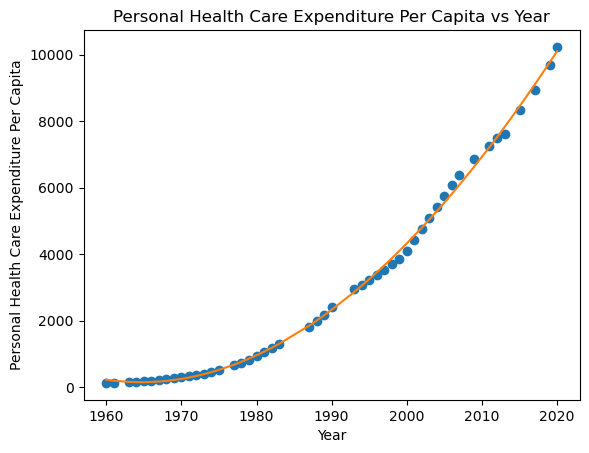

In [16]:
m1, m2, m3 = poly_coef

plt.plot(X_train, y_train, 'o')
plt.plot(X_train, m1 * X_train + m2 * (X_train**2) + m3 * (X_train**3) + b)
plt.title('Personal Health Care Expenditure Per Capita vs Year')
plt.xlabel('Year')
plt.ylabel('Personal Health Care Expenditure Per Capita')

As shown above, this resulted in a much higher R squared value and the best fitted line looks very close to our actual data.

# Implement Principal Components Analysis
In this section, we add another utility function to our toolkit, PCA, where new dimensionality is calculated using eigenvalues and eigenvectors, and our data is then projected onto the new coordinate system. Depending on whether our data are on the same scales, we need to decide whether or not to apply 'whitening', which transforms the data to be on the scale of standard deviation.

In [17]:
from utility.pca import PCA

data = pd.read_csv(
        'data/pcatestdata.csv'
    )
X = data.iloc[:, :-1]
print('----PCA with no whitening----\n')
PCA(data=X).do_pca(normalize=False)
print('----PCA with whitening----\n')
PCA(data=X).do_pca(normalize=True)

----PCA with no whitening----

Mean: [2.2  3.48 4.36]
Standard Deviation: [1. 1. 1.]
Eigenvalues: [5.42295565 0.36830813 0.01373623]
Eigenvectors: 
[[ 0.55824536  0.82963815  0.00791549]
 [-0.03924415  0.01687435  0.99908716]
 [-0.82874725  0.55804641 -0.04197848]]
----PCA with whitening----

Mean: [2.2  3.48 4.36]
Standard Deviation: [1.16619038 1.72904598 0.5425864 ]
Eigenvalues: [2.49376433 1.24887614 0.00735953]
Eigenvectors: 
[[ 0.70649998  0.70689017  0.03411832]
 [-0.03557058 -0.01268     0.99928672]
 [-0.70681858  0.70720966 -0.01618608]]


,0,1,2
0,-1.486784,0.308228,-0.045819
1,0.882160,0.595033,-0.118720
2,2.173573,-0.922036,0.035284
3,-1.502494,-1.350044,0.021931
4,-0.066455,1.368819,0.107324


In the above kernel, we applied PCA to the test dataset both with and without whitening. As suspected, the eigenvalues and eigenvectors differ between the two options, and judging from the eigenvalues, analysis with whitening was able to reduce more dimensions as the first eigenvalue of the whitened analysis is of much higher percentage of the total.

# Apply PCA
We will now apply PCA on our health expenditure dataset. Because we have different units and original scales for our features (year vs. dollars), we enable whitening to put all data on a standard scale.

In [18]:
train_data = pd.read_csv(train_data_file)
test_data = pd.read_csv(test_data_file)

X_train = train_data[features].to_numpy(copy=True)
X_test = test_data[features].to_numpy(copy=True)

pca = PCA(train_data[features])
projected_data = pca.do_pca(normalize=True)

Mean: [1988.73469388  246.71428571  112.2244898 ]
Standard Deviation: [ 17.50192469 274.1190714  129.85333411]
Eigenvalues: [2.87019725 0.14683515 0.0454676 ]
Eigenvectors: 
[[ 0.56975339  0.58726243  0.57489469]
 [-0.75905912  0.10793725  0.64201152]
 [ 0.3149767  -0.8021673   0.50726452]]


From the eigenvalues produced, we can calculate that the first eigenvector account for ~93% of the variance. To better understand the correlation between the principal components and our features, we can visualize using a heatmap where each eigenvector represents a principal component:

Text(0, 0.5, 'Principal components')

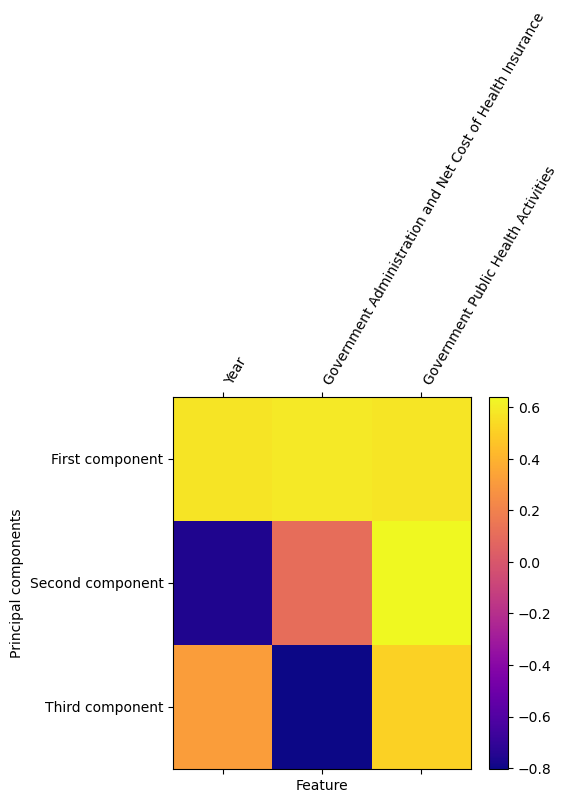

In [19]:
plt.matshow(pca.components, cmap='plasma', aspect='auto')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(features)),
features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

From the heatmap above, we can see that the first component is highly correlated with all three features, and the second component is highly correlated with Government Public Health Activities. The first component is the most important component, and the third component is the least important component. As expected, the first component has generally high correlation from all three features, and the second and the third and mixed signs from each feature, making them less significant. 

# Implement multiple linear regression on the projected data
Now that we have projected our data onto the new components/eigenvectors, we re-run the multiple linear regression and examine if the results are different. 

In [20]:
X_train_pca = pca.transform(X_train, n_components=3)
lr = LinearRegression().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test, n_components=3)
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')
print(f'Training score: {lr.score(X_train_pca, y_train)}')
print(f'Testing score: {lr.score(X_test_pca, y_test)}')

Coefficients: [ 1739.93428464  -560.38209376 -1621.98139713]
Intercept: 3084.6326530612278
Training score: 0.9952506752230629
Testing score: 0.9894752381808559


Without eliminating any dimensions, the training and test score of our regression remains the same, while the coefficients and the y-intercept are different as expected, demonstrating a positive correlation of our target and the first component, and a negative one with the second and third component.

# Additional Work

## Repeatable Train Test Split

The `train_test_split_csv` tool in our utility package is repeatable with a seed provided by the user. This is demonstrated by the tests in `test_train_test_split_csv.py`.

## Building a Toolkit
Starting building yourself a set of automation tools/classes for managing and analyzing data. Do some design work first.

To avoid duplicating code throughout this series of projects, we start defining utility functions and classes and add them to our toolkit. 

So far, we have made the following tools in the `project1.utility` package:
* `linear_regression`
* `pca`
* `train_test_split`

# Reflection

In this project, we adopted a linear model, linear regression, to analyze the relationship between features of our dataset and the target variable, `Personal Health Care Expenditure per Capita`. Through splitting data into training and test set, fitting the model and calculating R squared values, examining coefficients, applying principal component analysis, and visualization of results, we have gained deeper understanding in:
*  The structure of the dataset and relationship between dependent and independent variables
*  Mechanism in which linear regression builds a model from the data
*  The importance of scaling data with different units/measurements
*  The fundamental idea of looking for covariance between features behind PCA for dimensionality reduction


# References

1. https://machinelearningmastery.com/implement-resampling-methods-scratch-python/
2. https://docs.python.org/3/howto/argparse.html#introducing-optional-arguments
3. https://www.nejm.org/doi/full/10.1056/nejmsa054744#:~:text=Adjusted%20for%20inflation%2C%20annual%20medical,gross%20domestic%20product%20(GDP).&text=At%20least%20half%20this%20increase,higher%20prices%20for%20existing%20care.
4. https://www.statology.org/scatterplot-with-regression-line-python/
5. https://towardsdatascience.com/polynomial-regression-in-python-b69ab7df6105
6. https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3#:~:text=The%20Mean%20Squared%20Error%20(MSE,out%20across%20the%20whole%20dataset.
7. https://www.sharpsightlabs.com/blog/numpy-axes-explained/

# Data Sources
1. Hannah Ritchie and Max Roser (2017) - "Obesity". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/obesity' [Online Resource]
2. https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi
3. https://www.cms.gov/research-statistics-data-and-systems/statistics-trends-and-reports/nationalhealthexpenddata/nationalhealthaccountshistorical
